In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm

from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

In [2]:
df = pd.read_csv("top10s_final.csv", index_col=0)
dtypes = df.dtypes
numerical_cols = list(dtypes[dtypes != 'object'][1:].index)
categorical_cols = list(dtypes[dtypes == "object"].index) + ["year"]
df.shape

(603, 14)

In [3]:
df.head()

,title,artist,genre,year,tempo,energy,danceability,loudness,liveness,valence,length,acousticness,speechiness,popularity
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,Love The Way You Lie,Eminem,hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,TiK ToK,Kesha,pop,2010,120,84,76,-3,29,71,200,10,14,80
4,Bad Romance,Lady Gaga,pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [22]:
len(df.title.unique()) + len(df.artist.unique()) + len(df.genre.unique())

788

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603 entries, 1 to 603
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         603 non-null    object
 1   artist        603 non-null    object
 2   genre         603 non-null    object
 3   year          603 non-null    int64 
 4   tempo         603 non-null    int64 
 5   energy        603 non-null    int64 
 6   danceability  603 non-null    int64 
 7   loudness      603 non-null    int64 
 8   liveness      603 non-null    int64 
 9   valence       603 non-null    int64 
 10  length        603 non-null    int64 
 11  acousticness  603 non-null    int64 
 12  speechiness   603 non-null    int64 
 13  popularity    603 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 70.7+ KB


There will be additional **789** features after OneHotEncoding these three features

# KMeans

In [25]:
sorted_years = df.year.sort_values().unique()
preprocessor = ColumnTransformer([
    ("scaler", StandardScaler(), list(range(4, 14))),
    ("ohe", OneHotEncoder(sparse_output=False), [0, 1, 2]),
    ("ordinal", OrdinalEncoder(categories=[sorted_years]), [3])
], remainder="drop")
preprocessor.fit(df.values)

ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                 [4, 5, 6, 7, 8, 9, 10, 11, 12, 13]),
                                ('ohe', OneHotEncoder(sparse_output=False),
                                 [0, 1, 2]),
                                ('ordinal',
                                 OrdinalEncoder(categories=[array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])]),
                                 [3])])

In [26]:
transformed_data = preprocessor.transform(df.values)
transformed_data.shape

(603, 799)

<Axes: >

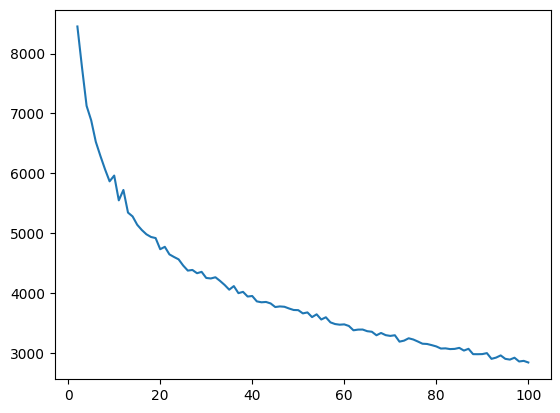

In [80]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
scores = []
for k in range(2, 101):
    model = KMeans(n_clusters=k, n_init="auto")
    model.fit(transformed_data)
    
    labels_ = model.predict(transformed_data)
    scores.append(calinski_harabasz_score(transformed_data, labels_))

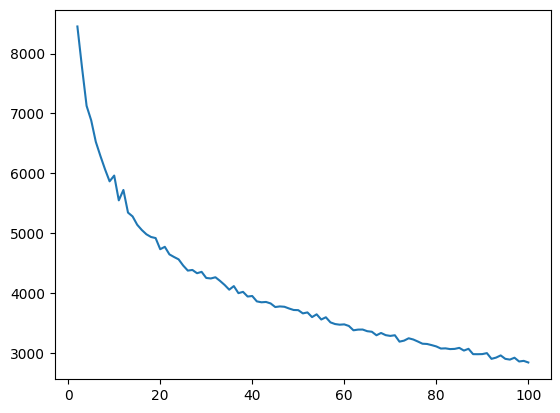

(4736.214113787043, None)

In [110]:
pd.Series(inertia, index=range(2,101)).plot()
pd.Series(inertia, index=range(2,101))[20], plt.show()

In [118]:
model = KMeans(n_clusters=13, n_init="auto")
model.fit(transformed_data)
labels = model.predict(transformed_data)
calinski_harabasz_score(transformed_data, labels)

55.549253677673065